In [2]:
# import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re

/Users/modeedna/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# import tweets df
tweets_df = pd.read_csv('../../data/projectData/Tweets.csv')

# create a corpus with the tweets
corpus = list(tweets_df['text'])

In [4]:
# import tweets df
tweets_df = pd.read_csv('../../data/projectData/Tweets.csv')

# create a corpus with the tweets
corpus = list(tweets_df['text'])

# create a list of tweets that are cleaned
cleanDocs = []
for doc in corpus:
    # make everything lowercase
    doc = doc.lower()
    # remove hashtags and mentions
    doc = re.sub("@[A-Za-z0-9_]+","", doc)
    doc = re.sub("#[A-Za-z0-9_]+","", doc)
    # remove possible links
    doc = re.sub(r"http\S+", "", doc)
    doc = re.sub(r"www.\S+", "", doc)
    # remove punctuation symbols
    doc = re.sub('[()!?]', ' ', doc)
    doc = re.sub('\[.*?\]',' ', doc)
    # only keep alpha characters
    doc = re.sub("[^a-z0-9]"," ", doc)
    # remove rt
    doc = re.sub("rt",'',doc)
    cleanDocs.append(doc)

# remove duplicates
corpus = list(set(cleanDocs))

In [7]:
# create a dataframe of clean tweets
cleanTweets = pd.DataFrame(corpus)
cleanTweets.to_csv('../../data/cleanData/cleanTweetText.csv')

In [12]:
#initialize vectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=50)

# fit transform to vectorizer
Xs = vectorizer.fit_transform(corpus)

In [13]:
### explore object attributes

# VOCABULARY DICTIONARY
#print("vocabulary = ",vectorizer.vocabulary_)   

# STOP WORDS 
print("stop words =", vectorizer.stop_words)

# col_names
col_names=vectorizer.get_feature_names_out()
print("col_names=",col_names)

stop words = english
col_names= ['2022' '22' 'al' 'amp' 'argentina' 'breakingnews' 'copa' 'cup' 'da'
 'days' 'del' 'doha' 'du' 'el' 'en' 'es' 'est' 'fans' 'fifa' 'fifa22'
 'fifaworldcup' 'fifaworldcupes' 'fifaworldcupqatar2022' 'final'
 'football' 'goal' 'la' 'le' 'los' 'lusail' 'match' 'messi' 'mundial'
 'new' 'nft' 'para' 'players' 'qatar' 'qatar2022' 'que' 'ready' 'se'
 'soccer' 'stadium' 'team' 'time' 'win' 'world' 'worldcup' 'worldcup2022']


In [14]:
#CONVERT TO DENSE MATRIX
X=np.array(Xs.todense())

In [15]:
#CONVERT DOCUMENT TERM FREQUENCY TO ONE HOT ENCODED VECTORS
maxs=np.max(X,axis=0)
ONE_HOT_ENCODED=np.ceil(X/maxs)
print("MAX COUNT:",maxs)
print("ONE_HOT_ENCODED")
print(ONE_HOT_ENCODED)

MAX COUNT: [3 2 1 3 2 1 2 2 2 1 2 2 2 2 3 2 2 1 3 1 2 1 1 1 2 2 4 3 2 2 1 2 2 1 1 2 1
 2 1 3 1 2 1 2 2 2 2 2 1 1]
ONE_HOT_ENCODED
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


              2022        22            al       amp  argentina  breakingnews  \
0     2.711055e-06  0.000007  1.000010e+00  0.000010   0.000003      0.000008   
1     3.210811e-06  0.000004  3.433110e-06  0.000005   0.000003      0.000003   
2     9.668580e-06  0.000007  6.215416e-06  0.000002   0.000008      1.000003   
3     3.017535e-06  0.000004  8.155772e-07  0.000002   0.000008      0.000005   
4     8.429733e-06  1.000008  3.293195e-06  0.000002   0.000007      0.000005   
...            ...       ...           ...       ...        ...           ...   
2386  9.287464e-06  0.000007  6.831980e-07  0.000009   0.000002      0.000003   
2387  6.609540e-06  0.000005  7.609854e-06  0.000006   0.000010      0.000004   
2388  2.817486e-06  0.000009  4.175429e-06  0.000004   0.000001      1.000003   
2389  6.041150e-06  0.000001  3.553709e-06  0.000004   0.000006      0.000001   
2390  2.856165e-07  0.000007  2.670841e-06  0.000004   0.000006      0.000006   

          copa       cup   

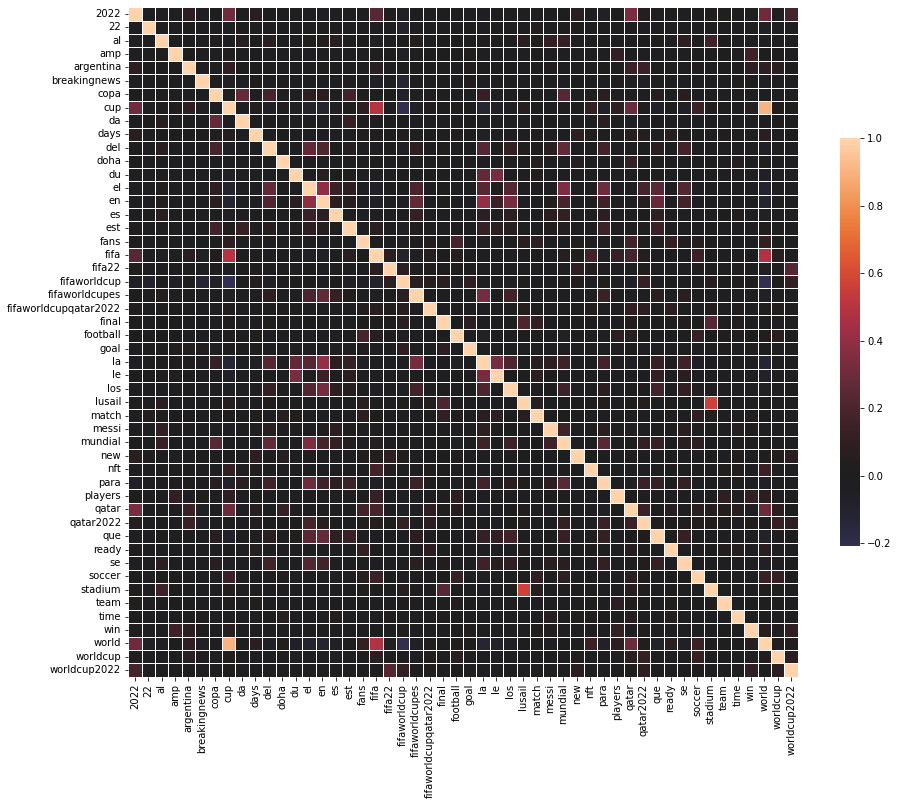

In [21]:
#------------------------
#PANDAS AND SEABORN STUFF
#------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

noise=np.random.uniform(0,0.00001,X.shape) 

df=pd.DataFrame(noise+X, columns=col_names)
#REORDER FROM MOST FREQUENT WORD IN CORPUS TO LEAST
# MAX_WORD=min(len(SORTED_COL_NAME),5)
# df=df[SORTED_COL_NAME[0:MAX_WORD]]
print(df)

print(df.describe())
corr=df.corr()
print("CORR=",corr)

# sns.pairplot(df, diag_kind='kde', kind="hist")  # SLOWER
# plt.show()

# # Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [23]:
# export data frame of correlations to clean data folder
df.to_csv('../../data/cleanData/cleanTweets.csv')